# Regressão Múltipla

Este dataset é muito  usado em aprendizado de regressões múltiplas. Refere-se a estudo de preços feitos em uma população da cidade de Boston, Massachusetts, EUA, na década de 1970. Cada observação na amostra é um setor censitário que tem entre 1000 e 8000 pessoas.

In [40]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy as sp

%matplotlib inline
boston = load_boston()

### Descrição do dataset

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Criando um dataframe

In [4]:
df = pd.DataFrame(boston.data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Determinando os nomes das colunas

In [6]:
df.columns = boston.feature_names

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['MEDV'] = boston.target # Median value of owner-occupied homes in $1000's

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Analisando os dados

In [10]:
df.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.0,391.4,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


### Variância x Covariância

__1 - Verificação por tabela__

In [11]:
df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


__2 - Verificação por gráficos__

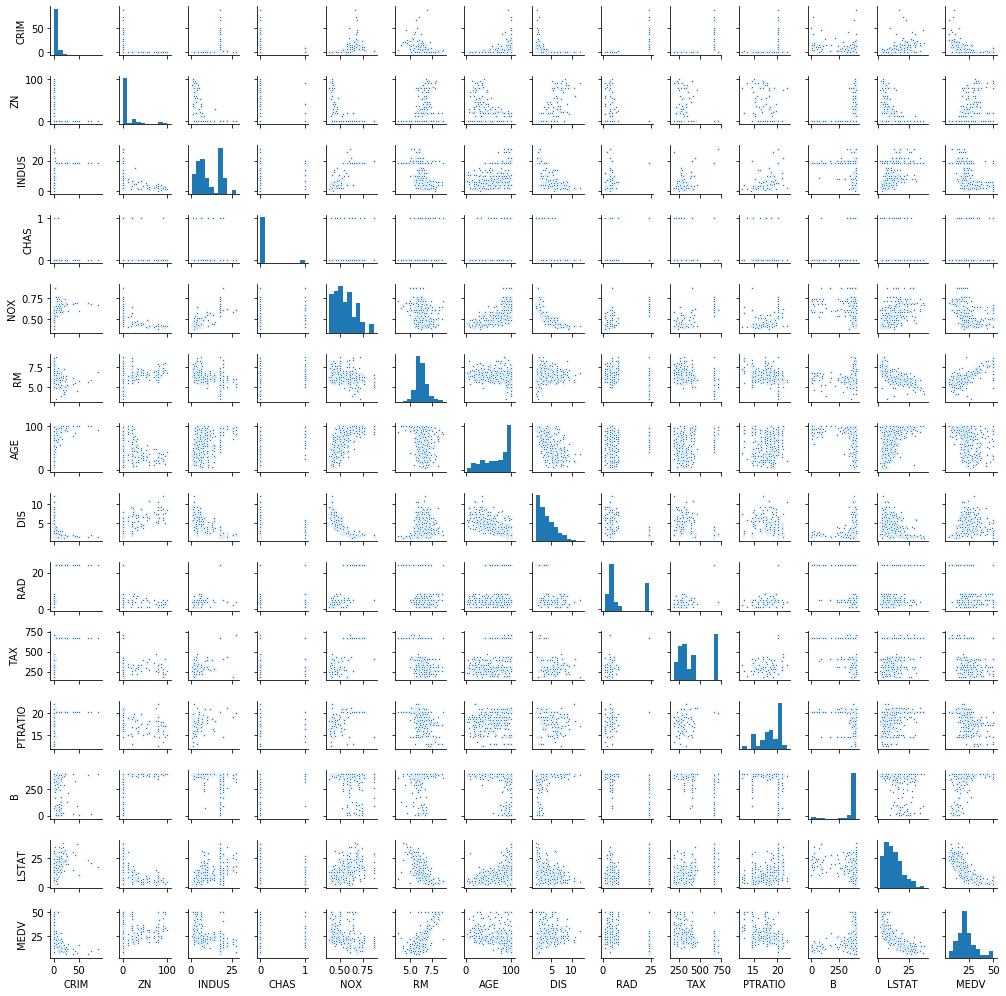

In [12]:
sns.pairplot(
    data=df,
    vars=list(df),
    height=1,
    plot_kws={'s': 5}
);

__3 - Verificação por mapa de calor__

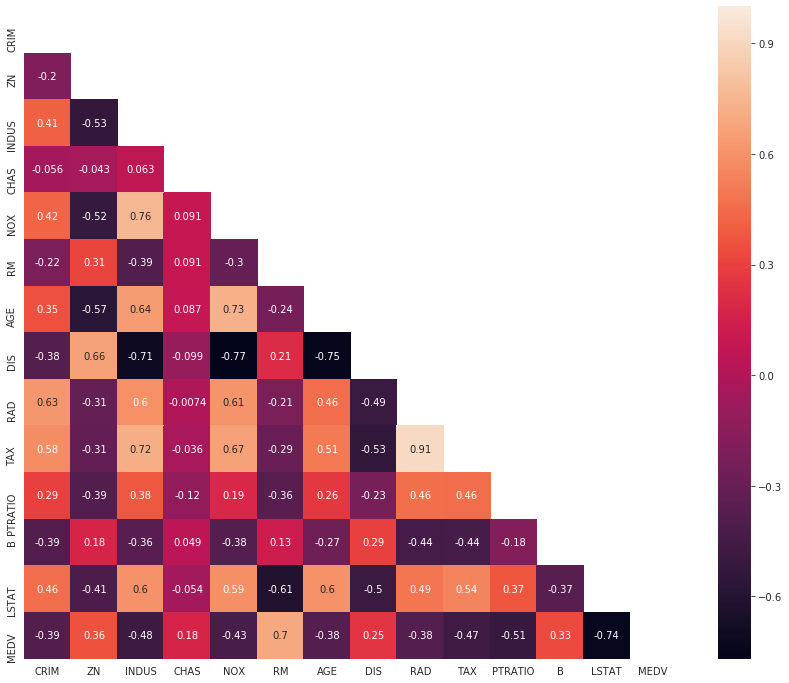

In [13]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(15, 12));
    
    sns.heatmap(
        corr,
        ax=ax,
        annot=True,
        mask=mask,
        square=True
    );

### Histograma do valor médio das casas (MEDV)

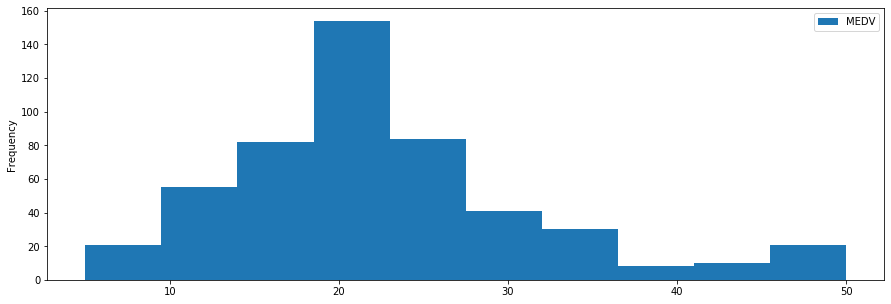

In [14]:
df[['MEDV']].plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

__Passando o LOG__

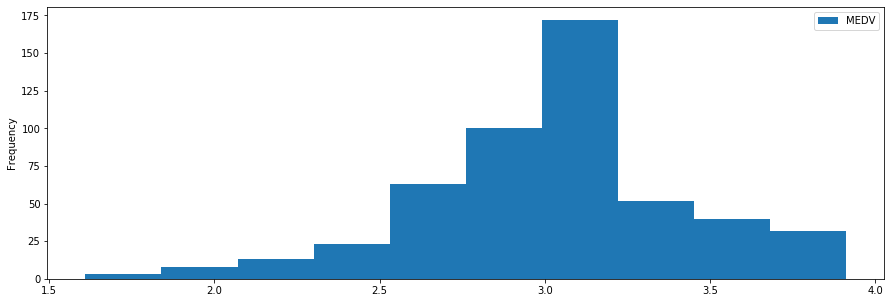

In [15]:
np.log(df[['MEDV']]).plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

# Rodando regressões

### MEDV x AGE

In [16]:
def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())

In [17]:
run_regression(df,'''MEDV ~ AGE''')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.57e-18
Time:                        13:01:10   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

__OBSERVAÇÕES:__<BR>
__R quadrado = 0.142 - ou seja, 14% do valor das casas é explicado pela variável AGE__
<br>
__coef = -0.1232 - ou seja, a variável AGE diminui o valor das casas em -12%__
<br>
__P>|t|=0.0000 - ou seja, a variável AGE é estatisticamente relevante no impacto dos valores médios das casas__

### MEDV x AGE com LOG

In [18]:
run_regression(df,'''np.log(MEDV) ~ AGE''')

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           5.03e-27
Time:                        13:10:10   Log-Likelihood:                -206.57
No. Observations:                 506   AIC:                             417.1
Df Residuals:                     504   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4860      0.043     81.584      0.0

__OBSERVAÇÕES:__<BR>
__R quadrado = 0.206 - ou seja, 20% do valor das casas é explicado pela variável AGE__
<br>
__coef = -0.0066 - ou seja, a variável AGE diminui o valor das casas em 0,0066 para cada unidade de idade (ano)__
<br>
__P>|t|=0.0000 - ou seja, a variável AGE é estatisticamente relevante no impacto dos valores médios das casas__

__MED x CHAS - ou quanto morar perto do rio Charles impacta no preço médio das casas?__

In [20]:
run_regression(df,'''MEDV ~ CHAS''')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           7.39e-05
Time:                        13:13:16   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

__OBSERVAÇÕES:__<BR>
__R quadrado = 0.031 - ou seja, 3% do valor das casas é explicado pela variável AGE__
<br>
__coef = 6.3462 - ou seja, a variável CHAS aumenta em 6,3462 unidades o valor das casas__
<br>
__P>|t|=0.0000 - ou seja, a variável CHAS é estatisticamente relevante no impacto dos valores médios das casas__

### Regressão por todas as variáveis

In [22]:
run_regression(df,'''MEDV ~ CRIM +
ZN +
INDUS +
CHAS +
NOX +
RM +
AGE +
DIS +
RAD +
TAX +
PTRATIO +
B +
LSTAT''')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        13:27:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

__OBSERVAÇÕES:__<BR>
__R quadrado = 0.741 - ou seja, 74% do valor das casas é explicado por esste modelo com todas as variáveis__
<br>
__as 2 variáveis que mais impactam os valores médios POSITIVAMENTE são CHAS e RM__
<br>
__A variável que menos impacta os valores médios POSITIVAMENTE é AGE (idade ds habitações)__
<br>
__A variável que mais impacta os valores médios NEGATIVAMENTE é NOX (concentração de gases poluentes)__
<br>
__A variável que menos impacta os valores médios NEGATIVAMENTE é TAX (taxa predial por cada $10000)__
<br>
__P>|t|=0.0000 - ou seja, a variável CHAS é estatisticamente relevante no impacto dos valores médios das casas__

# Aumentando o R2 em mais de 80%

Para isso, necessário fazer um tratamento em algumas variáveis. As melhores são CHAS e RM:

In [24]:
df['CHAS_2'] = df['CHAS']**2
df['RM_2'] = df['RM']**2

In [25]:
run_regression(df,'''MEDV ~ CRIM +
ZN +
CHAS +
CHAS_2 +
NOX +
RM +
RM_2 +
DIS +
RAD +
TAX +
PTRATIO +
B +
LSTAT''')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 23 Jun 2019   Prob (F-statistic):          5.07e-165
Time:                        13:41:35   Log-Likelihood:                -1429.7
No. Observations:                 506   AIC:                             2885.
Df Residuals:                     493   BIC:                             2940.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.1906      9.088     14.876      0.0

# Identificando os melhores imóveis para compra deste dataset

In [26]:
function = '''MEDV ~ CRIM +
ZN +
CHAS +
CHAS_2 +
NOX +
RM +
RM_2 +
DIS +
RAD +
TAX +
PTRATIO +
B +
LSTAT'''

In [27]:
model = smf.ols(function, df).fit()

In [28]:
yhat = model.predict()

In [30]:
yhat[:20]

array([28.67248021, 24.19682579, 31.35046974, 29.26435816, 29.03996647,
       25.00873343, 22.0298761 , 18.26478765, 11.52564072, 18.18881326,
       17.68141074, 20.78972805, 20.16185929, 19.99658267, 19.34017199,
       19.98874937, 21.00789691, 17.01053065, 18.31587987, 19.17967028])

In [31]:
residuo = yhat - df.MEDV

__Plotando os resíduos__

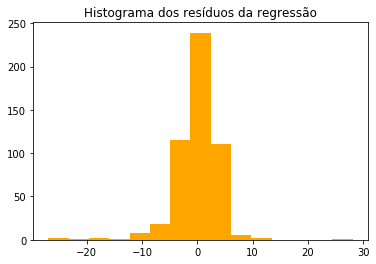

In [35]:
plt.hist(residuo, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

__Observação: os resíduos precisam ter distribuição normal com média 0.__

__Plotando a dispersão dos valores preditos e dos resíduos__

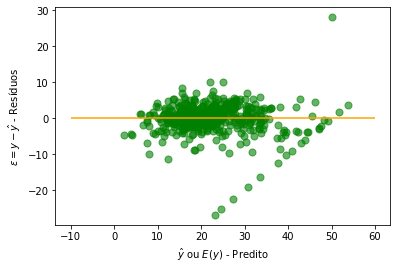

In [38]:
plt.scatter(y=residuo, x=yhat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=60, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

__Os 10 melhores imóveis para compra, de acordo com o resíduo, são os de Id abaixo e também podem ser vistos no gráfico.__

In [34]:
residuo.sort_values()[:10]

371   -26.902535
372   -25.339804
368   -22.575303
369   -19.139694
370   -16.534005
161   -12.420661
214   -11.409257
186   -10.374840
412    -9.894422
181    -9.864927
Name: MEDV, dtype: float64